# Brest Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import os


In [35]:
print(os.getcwd())
os.chdir("C:\\bb\\DataScience\\kaggle")

df = pd.read_csv("test.csv")

C:\bb\DataScience\kaggle


In [36]:
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [37]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,548.500000,2.494536,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572
std,105.799338,1.112185,3.455958,0.170971,2.006108,0.465921,0.516057,0.176112,0.156756,0.134206,0.078194
min,366.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.254167,0.046650
25%,457.250000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.347708,0.350685,0.508125,0.133721
50%,548.500000,2.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.497779,0.611875,0.174750
75%,639.750000,3.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.653958,0.607646,0.711146,0.231196
max,731.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.804913,0.925000,0.441563


In [38]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

In [39]:
df2 = df.copy()


## k-means

In [40]:
from sklearn.cluster import KMeans

In [41]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,1:10])
    wcss.append(kmeans.inertia_)
    

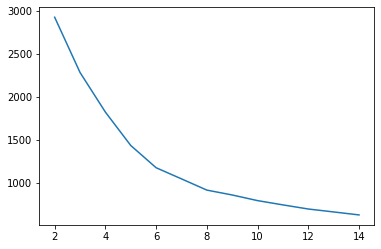

In [42]:
sns.lineplot(x=range(2, 15), y=wcss)

In [43]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,1:10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [44]:
df2['cluster'] = kmeans.labels_

C:\Users\vladip\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vladip\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


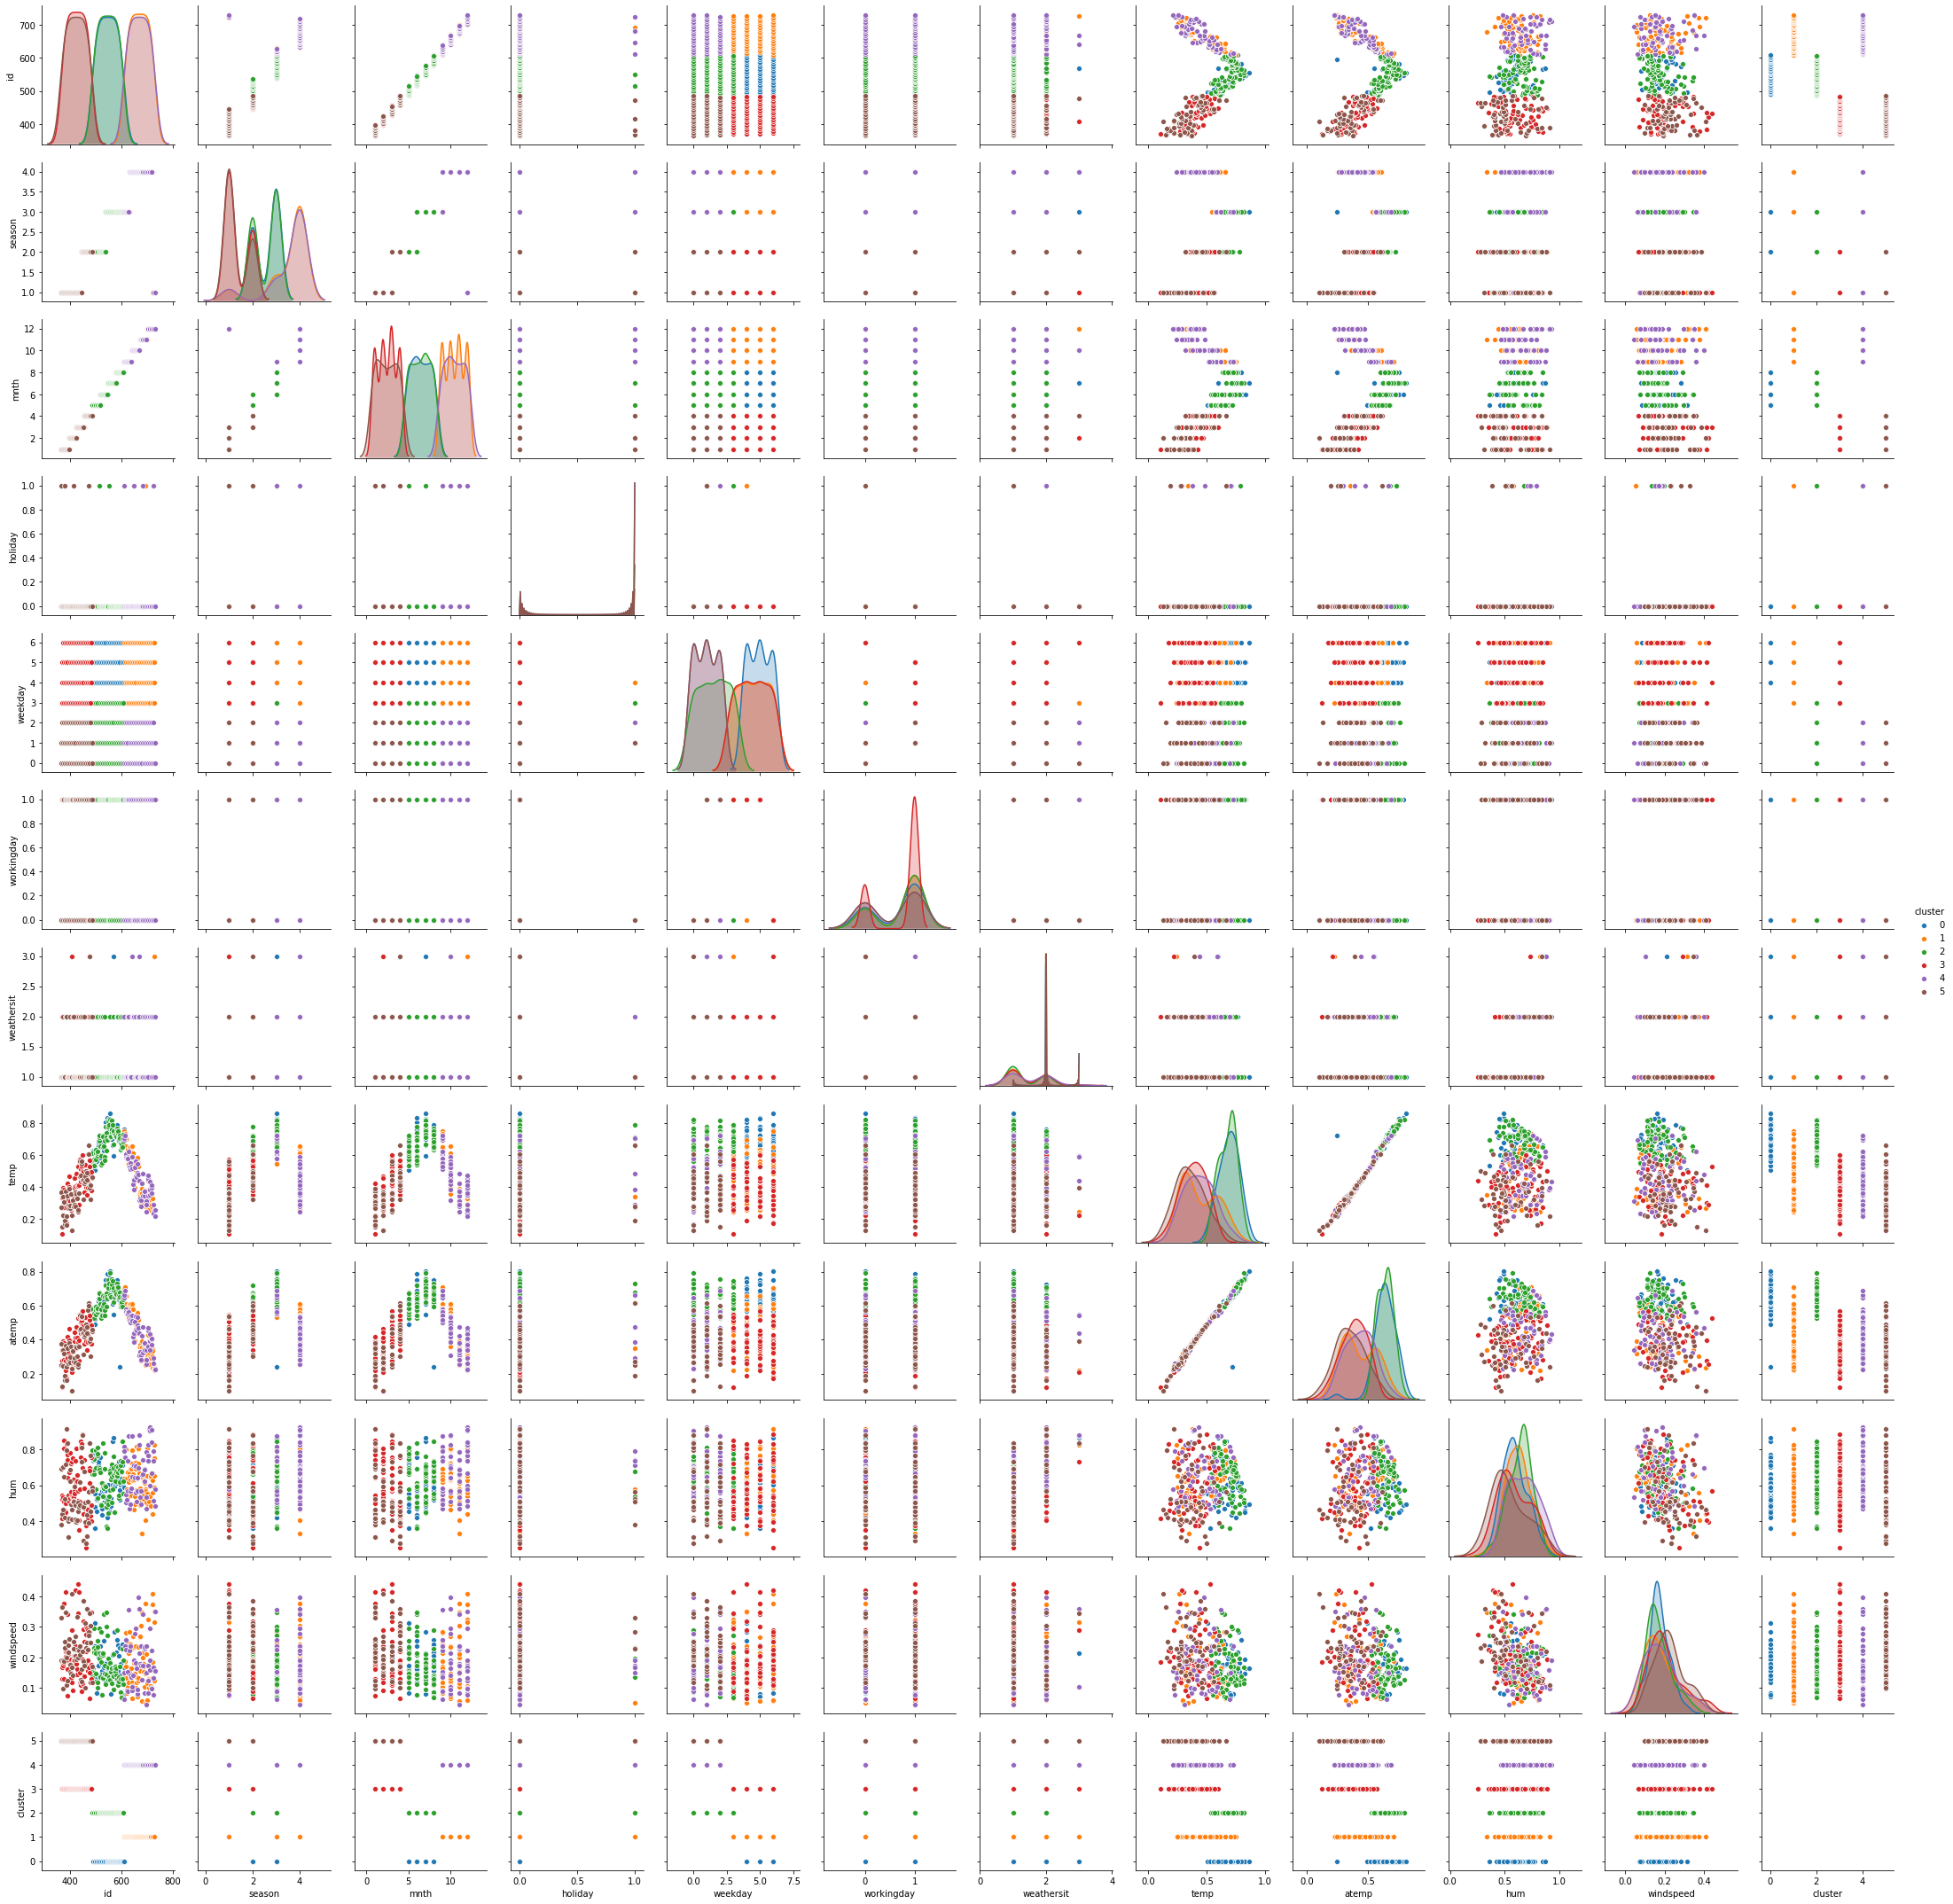

In [45]:
sns.pairplot(df2,hue="cluster")

In [46]:
pd.crosstab(df2.cluster,df2.season)

season,1,2,3,4
cluster,,,,
0,0,21,32,0
1,6,0,13,50
2,0,30,40,0
3,44,24,0,0
4,5,0,9,39
5,36,17,0,0


In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [48]:
linked = linkage(df.iloc[:,1:10], 'ward')

labelList = range(2, 15)

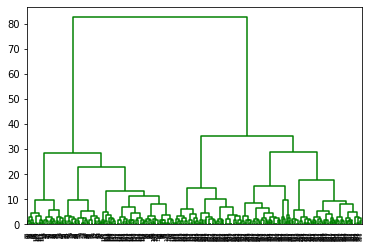

In [49]:
dn = dendrogram(linked,color_threshold=120)


In [50]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [51]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,1,0,5,47,0,0
1,0,0,0,14,49,6
2,0,0,34,13,0,23
3,40,11,17,0,0,0
4,0,0,0,0,5,48
5,0,29,24,0,0,0


In [52]:
df2.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cluster,hcluster
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,548.500000,2.494536,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572,2.431694,3.795082
std,105.799338,1.112185,3.455958,0.170971,2.006108,0.465921,0.516057,0.176112,0.156756,0.134206,0.078194,1.630020,1.618075
min,366.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.254167,0.046650,0.000000,1.000000
25%,457.250000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.347708,0.350685,0.508125,0.133721,1.000000,3.000000
50%,548.500000,2.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.497779,0.611875,0.174750,2.000000,4.000000
75%,639.750000,3.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.653958,0.607646,0.711146,0.231196,4.000000,5.000000
max,731.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.804913,0.925000,0.441563,5.000000,6.000000


In [53]:
df2.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cluster,hcluster
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,5,2
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,5,2
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,5,2
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,3,2
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,3,2


### Store file in a new csv

In [54]:
df2.to_csv("test_enriched.csv")